In [134]:
!pip install mysql-connector-python

In [146]:
import pandas as pd
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')

In [147]:
bom_df = pd.read_sql_query("""SELECT bom_movie_gross.title, bom_movie_gross.domestic_gross, bom_movie_gross.foreign_gross, tmdb_movies.release_date, imdb_title_basics.genres, tmdb_movies.vote_average, tmdb_movies.popularity
FROM bom_movie_gross
LEFT JOIN tmdb_movies ON bom_movie_gross.title = tmdb_movies.title
LEFT JOIN imdb_title_basics ON bom_movie_gross.title = imdb_title_basics.title""",con)

In [148]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093 entries, 0 to 5092
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           5093 non-null   object 
 1   domestic_gross  5044 non-null   float64
 2   foreign_gross   3048 non-null   float64
 3   release_date    4028 non-null   object 
 4   genres          4416 non-null   object 
 5   vote_average    4028 non-null   float64
 6   popularity      4028 non-null   float64
dtypes: float64(4), object(3)
memory usage: 278.6+ KB


In [149]:
tn_budget_df = pd.read_sql_query("""SELECT tn_movie_budgets.movie, tn_movie_budgets.domestic_gross, tn_movie_budgets.worldwide_gross, tn_movie_budgets.release_date, imdb_title_basics.genres, tn_movie_budgets.production_budget
FROM tn_movie_budgets
LEFT JOIN imdb_title_basics ON imdb_title_basics.primary_title = tn_movie_budgets.movie""",con)

In [150]:
tn_budget_df.tail()

movie domestic_gross worldwide_gross  \
7246                         Red 11             $0              $0   
7247                      Following        $48,482        $240,495   
7248  Return to the Land of Wonders         $1,338          $1,338   
7249           A Plague So Pleasant             $0              $0   
7250              My Date With Drew       $181,041        $181,041   

      release_date                  genres production_budget  
7246  Dec 31, 2018  Horror,Sci-Fi,Thriller            $7,000  
7247   Apr 2, 1999                    None            $6,000  
7248  Jul 13, 2005                    None            $5,000  
7249  Sep 29, 2015   Drama,Horror,Thriller            $1,400  
7250   Aug 5, 2005                    None            $1,100

In [151]:
tn_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7251 entries, 0 to 7250
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              7251 non-null   object
 1   domestic_gross     7251 non-null   object
 2   worldwide_gross    7251 non-null   object
 3   release_date       7251 non-null   object
 4   genres             3902 non-null   object
 5   production_budget  7251 non-null   object
dtypes: object(6)
memory usage: 340.0+ KB


In [152]:
tn_budget_df = tn_budget_df.drop_duplicates(subset='movie')

In [153]:
tn_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 7250
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5698 non-null   object
 1   domestic_gross     5698 non-null   object
 2   worldwide_gross    5698 non-null   object
 3   release_date       5698 non-null   object
 4   genres             2369 non-null   object
 5   production_budget  5698 non-null   object
dtypes: object(6)
memory usage: 311.6+ KB


In [154]:
tn_budget_df = tn_budget_df.rename(columns={'movie':'title'})

In [155]:
tn_budget_df

title domestic_gross  \
0                                          Avatar   $760,507,625   
1     Pirates of the Caribbean: On Stranger Tides   $241,063,875   
2                                    Dark Phoenix    $42,762,350   
3                         Avengers: Age of Ultron   $459,005,868   
4               Star Wars Ep. VIII: The Last Jedi   $620,181,382   
...                                           ...            ...   
7246                                       Red 11             $0   
7247                                    Following        $48,482   
7248                Return to the Land of Wonders         $1,338   
7249                         A Plague So Pleasant             $0   
7250                            My Date With Drew       $181,041   

     worldwide_gross  release_date                    genres production_budget  
0     $2,776,345,279  Dec 18, 2009                    Horror      $425,000,000  
1     $1,045,663,875  May 20, 2011  Action,Adventure,Fantasy      $410,600,000  
2       $149,762,350   Jun 7, 2019   Action,Adventure,Sci-Fi      $350,000,000  
3     $1,403,013,963   May 1, 2015   Action,Adventure,Sci-Fi      $330,600,000  
4     $1,316,721,747  Dec 15, 2017                      None      $317,000,000  
...              ...           ...                       ...               ...  
7246              $0  Dec 31, 2018    Horror,Sci-Fi,Thriller            $7,000  
7247        $240,495   Apr 2, 1999                      None            $6,000  
7248          $1,338  Jul 13, 2005                      None            $5,000  
7249              $0  Sep 29, 2015     Drama,Horror,Thriller            $1,400  
7250        $181,041   Aug 5, 2005                      None            $1,100  

[5698 rows x 6 columns]

In [156]:
df = pd.concat([bom_df,tn_budget_df], axis=0, join='outer')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10791 entries, 0 to 7250
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              10791 non-null  object 
 1   domestic_gross     10742 non-null  object 
 2   foreign_gross      3048 non-null   float64
 3   release_date       9726 non-null   object 
 4   genres             6785 non-null   object 
 5   vote_average       4028 non-null   float64
 6   popularity         4028 non-null   float64
 7   worldwide_gross    5698 non-null   object 
 8   production_budget  5698 non-null   object 
dtypes: float64(3), object(6)
memory usage: 843.0+ KB


In [158]:
df = df.drop_duplicates(subset=['title'],keep='last')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7846 entries, 3 to 7250
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              7846 non-null   object 
 1   domestic_gross     7820 non-null   object 
 2   foreign_gross      957 non-null    float64
 3   release_date       6896 non-null   object 
 4   genres             3908 non-null   object 
 5   vote_average       1198 non-null   float64
 6   popularity         1198 non-null   float64
 7   worldwide_gross    5698 non-null   object 
 8   production_budget  5698 non-null   object 
dtypes: float64(3), object(6)
memory usage: 613.0+ KB


In [160]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7846 entries, 3 to 7250
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              7846 non-null   object        
 1   domestic_gross     7820 non-null   object        
 2   foreign_gross      957 non-null    float64       
 3   release_date       6896 non-null   datetime64[ns]
 4   genres             3908 non-null   object        
 5   vote_average       1198 non-null   float64       
 6   popularity         1198 non-null   float64       
 7   worldwide_gross    5698 non-null   object        
 8   production_budget  5698 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 613.0+ KB


In [162]:
df['worldwide_gross'].replace( '\$','', regex=True, inplace=True)
df['foreign_gross'].replace( '\$','', regex=True, inplace=True)
df['domestic_gross'].replace( '\$','', regex=True, inplace=True)
df['production_budget'].replace( '\$','', regex=True, inplace=True)

In [163]:
df['worldwide_gross'].replace( ',','', regex=True, inplace=True)
df['foreign_gross'].replace( ',','', regex=True, inplace=True)
df['domestic_gross'].replace( ',','', regex=True, inplace=True)
df['production_budget'].replace( ',','', regex=True, inplace=True)

In [164]:
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'])
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'])
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'])
df['production_budget'] = pd.to_numeric(df['production_budget'])

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7846 entries, 3 to 7250
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              7846 non-null   object        
 1   domestic_gross     7820 non-null   float64       
 2   foreign_gross      957 non-null    float64       
 3   release_date       6896 non-null   datetime64[ns]
 4   genres             3908 non-null   object        
 5   vote_average       1198 non-null   float64       
 6   popularity         1198 non-null   float64       
 7   worldwide_gross    5698 non-null   float64       
 8   production_budget  5698 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 613.0+ KB


In [166]:
df.head()

title  domestic_gross  \
3   Percy Jackson & The Olympians: The Lightning T...      88800000.0   
14                                  The King's Speech     135500000.0   
18                                   The Back-Up Plan      37500000.0   
27                        Scott Pilgrim vs. the World      31500000.0   
44                Prince of Persia: The Sands of Time      90800000.0   

    foreign_gross release_date                    genres  vote_average  \
3     137700000.0   2010-02-11  Adventure,Family,Fantasy           6.1   
14    275400000.0   2010-09-06   Biography,Drama,History           7.7   
18     40000000.0   2010-04-23            Comedy,Romance           6.0   
27     16100000.0   2010-08-13     Action,Comedy,Fantasy           7.3   
44    245600000.0   2010-05-27  Action,Adventure,Fantasy           6.2   

    popularity  worldwide_gross  production_budget  
3       26.691              NaN                NaN  
14      16.798              NaN                NaN  
18      15.490              NaN                NaN  
27      14.383              NaN                NaN  
44      13.440              NaN                NaN

In [200]:
df.loc[df['worldwide_gross'].isna()].sum()

index                                                          4018882
title                22 Bullets14 BladesHappyThankYouMorePleaseTerk...
domestic_gross                                             1.18487e+09
foreign_gross                                              3.94812e+08
vote_average                                                    4451.6
popularity                                                     4080.83
worldwide_gross                                                      0
production_budget                                                    0
release_year                                               1.39794e+06
release_month                                                     4661
release_day                                                      10682
dtype: object

In [168]:
df = df.reset_index()

In [109]:
df.loc[1,]

level_0                              1
index                                1
title                       Iron Man 2
domestic_gross               3.124e+08
foreign_gross                3.115e+08
release_date       2010-05-07 00:00:00
worldwide_gross                    NaN
Name: 1, dtype: object

In [169]:
import math

In [170]:

for i in range(len(df)):
    if(math.isnan(df.loc[i,'worldwide_gross'])):
        df.loc[i,'worldwide_gross'] = df.loc[i,'domestic_gross'] + df.loc[i,'foreign_gross']
        print(df.loc[i,])

index                                                                3
title                Percy Jackson & The Olympians: The Lightning T...
domestic_gross                                                8.88e+07
foreign_gross                                                1.377e+08
release_date                                       2010-02-11 00:00:00
genres                                        Adventure,Family,Fantasy
vote_average                                                       6.1
popularity                                                      26.691
worldwide_gross                                              2.265e+08
production_budget                                                  NaN
Name: 0, dtype: object
index                                     14
title                      The King's Speech
domestic_gross                     1.355e+08
foreign_gross                      2.754e+08
release_date             2010-09-06 00:00:00
genres               Biography,Drama,Histo

index                                331
title                         Picture Me
domestic_gross                     12000
foreign_gross                      10400
release_date         2010-09-19 00:00:00
genres                              None
vote_average                         6.8
popularity                           1.4
worldwide_gross                    22400
production_budget                    NaN
Name: 84, dtype: object
index                                339
title                   Formosa Betrayed
domestic_gross                    225000
foreign_gross                     101000
release_date         2010-02-26 00:00:00
genres                              None
vote_average                         6.3
popularity                         1.394
worldwide_gross                   326000
production_budget                    NaN
Name: 85, dtype: object
index                                     340
title                Vidal Sassoon: The Movie
domestic_gross                          

index                                716
title                     Double Dhamaal
domestic_gross                    544000
foreign_gross                        NaN
release_date         2011-07-01 00:00:00
genres                Comedy,Crime,Drama
vote_average                         4.6
popularity                         4.392
worldwide_gross                      NaN
production_budget                    NaN
Name: 173, dtype: object
index                                  717
title                  Mysteries of Lisbon
domestic_gross                      111000
foreign_gross                        14900
release_date           2011-08-05 00:00:00
genres               Drama,Mystery,Romance
vote_average                             7
popularity                           4.249
worldwide_gross                     125900
production_budget                      NaN
Name: 174, dtype: object
index                                718
title                    The Double Hour
domestic_gross              

index                                1103
title                    Lay the Favorite
domestic_gross                      21000
foreign_gross                     1.6e+06
release_date          2012-12-07 00:00:00
genres               Comedy,Drama,Romance
vote_average                          5.3
popularity                          6.728
worldwide_gross                 1.621e+06
production_budget                     NaN
Name: 277, dtype: object
index                                1104
title                            10 Years
domestic_gross                     203000
foreign_gross                         NaN
release_date          2012-09-14 00:00:00
genres               Comedy,Drama,Romance
vote_average                          5.8
popularity                          6.724
worldwide_gross                       NaN
production_budget                     NaN
Name: 278, dtype: object
index                                1105
title                    Juan of the Dead
domestic_gross            

index                               1403
title                      To The Wonder
domestic_gross                    588000
foreign_gross                        NaN
release_date         2013-04-12 00:00:00
genres                     Drama,Romance
vote_average                         5.9
popularity                          9.81
worldwide_gross                      NaN
production_budget                    NaN
Name: 374, dtype: object
index                               1413
title                The Invisible Woman
domestic_gross                   1.2e+06
foreign_gross                        NaN
release_date         2013-12-25 00:00:00
genres                       Documentary
vote_average                           6
popularity                         9.555
worldwide_gross                      NaN
production_budget                    NaN
Name: 375, dtype: object
index                               1417
title                           The Past
domestic_gross                   1.3e+06
foreign

index                               1632
title                 You Will Be My Son
domestic_gross                    285000
foreign_gross                    3.6e+06
release_date         2013-08-16 00:00:00
genres                    Drama,Thriller
vote_average                         6.6
popularity                         1.922
worldwide_gross                3.885e+06
production_budget                    NaN
Name: 482, dtype: object
index                               1637
title                       The Daughter
domestic_gross                     26400
foreign_gross                        NaN
release_date         2013-04-17 00:00:00
genres                             Drama
vote_average                         4.7
popularity                         1.726
worldwide_gross                      NaN
production_budget                    NaN
Name: 483, dtype: object
index                                 1638
title                          Ghanchakkar
domestic_gross                      203000
f

Name: 572, dtype: object
index                                            1964
title                Next Time I'll Aim for the Heart
domestic_gross                                    800
foreign_gross                                     NaN
release_date                      2014-12-09 00:00:00
genres                           Crime,Drama,Thriller
vote_average                                      5.8
popularity                                      7.411
worldwide_gross                                   NaN
production_budget                                 NaN
Name: 573, dtype: object
index                                           1966
title                Better Living Through Chemistry
domestic_gross                                 75100
foreign_gross                                    NaN
release_date                     2014-03-14 00:00:00
genres                                  Comedy,Drama
vote_average                                       6
popularity                             

index                                 2090
title                      Beloved Sisters
domestic_gross                       54000
foreign_gross                      2.2e+06
release_date           2014-09-30 00:00:00
genres               Drama,History,Romance
vote_average                           5.8
popularity                           3.005
worldwide_gross                  2.254e+06
production_budget                      NaN
Name: 643, dtype: object
index                               2094
title                         Stray Dogs
domestic_gross                     10400
foreign_gross                        NaN
release_date         2014-09-12 00:00:00
genres               Crime,Drama,Mystery
vote_average                         6.8
popularity                         2.972
worldwide_gross                      NaN
production_budget                    NaN
Name: 644, dtype: object
index                                  2102
title                            Cantinflas
domestic_gross        

index                               2538
title                 He Named Me Malala
domestic_gross                   2.7e+06
foreign_gross                      97100
release_date         2015-10-02 00:00:00
genres                       Documentary
vote_average                         6.4
popularity                         5.957
worldwide_gross               2.7971e+06
production_budget                    NaN
Name: 749, dtype: object
index                               2539
title                             Mojave
domestic_gross                      8300
foreign_gross                        NaN
release_date         2015-04-18 00:00:00
genres                    Drama,Thriller
vote_average                         4.9
popularity                         5.951
worldwide_gross                      NaN
production_budget                    NaN
Name: 750, dtype: object
index                                2540
title                       Men & Chicken
domestic_gross                      30200
fore

Name: 840, dtype: object
index                                    3023
title                                The Wave
domestic_gross                         177000
foreign_gross                             NaN
release_date              2016-03-04 00:00:00
genres               Action,Documentary,Sport
vote_average                              6.5
popularity                              8.197
worldwide_gross                           NaN
production_budget                         NaN
Name: 841, dtype: object
index                                 3025
title                     The Sea of Trees
domestic_gross                       20400
foreign_gross                          NaN
release_date           2016-08-26 00:00:00
genres               Drama,Fantasy,Mystery
vote_average                           6.3
popularity                           8.148
worldwide_gross                        NaN
production_budget                      NaN
Name: 842, dtype: object
index                              

index                               3183
title                 A Beautiful Planet
domestic_gross                  1.55e+07
foreign_gross                    9.4e+06
release_date         2016-04-29 00:00:00
genres                       Documentary
vote_average                         6.9
popularity                         2.322
worldwide_gross                 2.49e+07
production_budget                    NaN
Name: 924, dtype: object
index                                           3184
title                       The Last Man on the Moon
domestic_gross                                 52500
foreign_gross                                    NaN
release_date                     2016-02-26 00:00:00
genres               Adventure,Biography,Documentary
vote_average                                     6.6
popularity                                     2.196
worldwide_gross                                  NaN
production_budget                                NaN
Name: 925, dtype: object
index     

index                                    3526
title                The Nile Hilton Incident
domestic_gross                          81100
foreign_gross                             NaN
release_date              2017-01-21 00:00:00
genres                   Crime,Drama,Thriller
vote_average                              6.6
popularity                              8.168
worldwide_gross                           NaN
production_budget                         NaN
Name: 1015, dtype: object
index                                  3537
title                 My Life as a Zucchini
domestic_gross                       310000
foreign_gross                           NaN
release_date            2017-02-24 00:00:00
genres               Animation,Comedy,Drama
vote_average                            7.8
popularity                            8.039
worldwide_gross                         NaN
production_budget                       NaN
Name: 1016, dtype: object
index                                 3538
title

index                               3887
title                    I Still See You
domestic_gross                      1400
foreign_gross                    1.5e+06
release_date         2018-10-12 00:00:00
genres                  Fantasy,Thriller
vote_average                         6.8
popularity                        12.867
worldwide_gross               1.5014e+06
production_budget                    NaN
Name: 1121, dtype: object
index                                      3889
title                You Were Never Really Here
domestic_gross                          2.5e+06
foreign_gross                               NaN
release_date                2018-04-06 00:00:00
genres                      Crime,Drama,Mystery
vote_average                                6.6
popularity                                12.59
worldwide_gross                             NaN
production_budget                           NaN
Name: 1122, dtype: object
index                               3891
title            

index                      4092
title                Videocracy
domestic_gross            23700
foreign_gross           1.2e+06
release_date                NaT
genres                     None
vote_average                NaN
popularity                  NaN
worldwide_gross      1.2237e+06
production_budget           NaN
Name: 1238, dtype: object
index                                                   4093
title                The Salvation Poem (Poema de Salvacion)
domestic_gross                                        915000
foreign_gross                                         183000
release_date                                             NaT
genres                                                  None
vote_average                                             NaN
popularity                                               NaN
worldwide_gross                                    1.098e+06
production_budget                                        NaN
Name: 1239, dtype: object
index             

index                            4231
title                A Beautiful Life
domestic_gross                  66200
foreign_gross                     NaN
release_date                      NaT
genres                  Drama,Romance
vote_average                      NaN
popularity                        NaN
worldwide_gross                   NaN
production_budget                 NaN
Name: 1362, dtype: object
index                                 4232
title                             Murder 2
domestic_gross                       59500
foreign_gross                          NaN
release_date                           NaT
genres               Action,Crime,Thriller
vote_average                           NaN
popularity                             NaN
worldwide_gross                        NaN
production_budget                      NaN
Name: 1363, dtype: object
index                                               4233
title                Battleship Potemkin (2011 re-issue)
domestic_gross          

index                                   4354
title                Patience (After Sebald)
domestic_gross                         15900
foreign_gross                            NaN
release_date                             NaT
genres                           Documentary
vote_average                             NaN
popularity                               NaN
worldwide_gross                          NaN
production_budget                        NaN
Name: 1470, dtype: object
index                                4355
title                     Cirkus Columbia
domestic_gross                       3500
foreign_gross                        9500
release_date                          NaT
genres               Comedy,Drama,Romance
vote_average                          NaN
popularity                            NaN
worldwide_gross                     13000
production_budget                     NaN
Name: 1471, dtype: object
index                           4356
title                Husbands in Goa
dome

Name: 1569, dtype: object
index                       4470
title                The Pirates
domestic_gross            416000
foreign_gross           3.21e+07
release_date                 NaT
genres                      None
vote_average                 NaN
popularity                   NaN
worldwide_gross       3.2516e+07
production_budget            NaN
Name: 1570, dtype: object
index                           4471
title                The Divine Move
domestic_gross                137000
foreign_gross               2.78e+07
release_date                     NaT
genres                  Action,Crime
vote_average                     NaN
popularity                       NaN
worldwide_gross           2.7937e+07
production_budget                NaN
Name: 1571, dtype: object
index                         4472
title                Iceman (2014)
domestic_gross                7700
foreign_gross              2.6e+07
release_date                   NaT
genres                        None
vote_average

Name: 1678, dtype: object
index                      4586
title                Max (2015)
domestic_gross         4.27e+07
foreign_gross           1.3e+06
release_date                NaT
genres                     None
vote_average                NaN
popularity                  NaN
worldwide_gross         4.4e+07
production_budget           NaN
Name: 1679, dtype: object
index                                           4587
title                The Secret in their Eyes (2015)
domestic_gross                              2.02e+07
foreign_gross                               1.47e+07
release_date                                     NaT
genres                                          None
vote_average                                     NaN
popularity                                       NaN
worldwide_gross                             3.49e+07
production_budget                                NaN
Name: 1680, dtype: object
index                             4588
title                Go Away Mr. 

index                                                       4706
title                Arabian Nights: Volume 2 - The Desolate One
domestic_gross                                              6400
foreign_gross                                                NaN
release_date                                                 NaT
genres                                                     Drama
vote_average                                                 NaN
popularity                                                   NaN
worldwide_gross                                              NaN
production_budget                                            NaN
Name: 1793, dtype: object
index                                4708
title                            Alleluia
domestic_gross                       6300
foreign_gross                         NaN
release_date                          NaT
genres               Crime,Horror,Romance
vote_average                          NaN
popularity                    

index                               4826
title                My Annoying Brother
domestic_gross                     52000
foreign_gross                        NaN
release_date                         NaT
genres                      Comedy,Drama
vote_average                         NaN
popularity                           NaN
worldwide_gross                      NaN
production_budget                    NaN
Name: 1904, dtype: object
index                                4827
title                Cemetery of Splendor
domestic_gross                      52000
foreign_gross                         NaN
release_date                          NaT
genres                      Drama,Fantasy
vote_average                          NaN
popularity                            NaN
worldwide_gross                       NaN
production_budget                     NaN
Name: 1905, dtype: object
index                          4828
title                      Disorder
domestic_gross                51900
foreign_gr

index                        4947
title                 I Can Speak
domestic_gross              63200
foreign_gross                 NaN
release_date                  NaT
genres               Comedy,Drama
vote_average                  NaN
popularity                    NaN
worldwide_gross               NaN
production_budget             NaN
Name: 2015, dtype: object
index                                 4948
title                Extraordinary Mission
domestic_gross                       54200
foreign_gross                          NaN
release_date                           NaT
genres                        Action,Crime
vote_average                           NaN
popularity                             NaN
worldwide_gross                        NaN
production_budget                      NaN
Name: 2016, dtype: object
index                     4950
title                Bluebeard
domestic_gross           43100
foreign_gross              NaN
release_date               NaT
genres                T

index                          5057
title                Revenge (2018)
domestic_gross               102000
foreign_gross                   NaN
release_date                    NaT
genres                         None
vote_average                    NaN
popularity                      NaN
worldwide_gross                 NaN
production_budget               NaN
Name: 2115, dtype: object
index                              5058
title                Unstoppable (2018)
domestic_gross                   101000
foreign_gross                       NaN
release_date                        NaT
genres                             None
vote_average                        NaN
popularity                          NaN
worldwide_gross                     NaN
production_budget                   NaN
Name: 2116, dtype: object
index                                                             5059
title                Reign of Judges: Title of Liberty - Concept Short
domestic_gross                                

In [171]:
df.head()

index                                              title  domestic_gross  \
0      3  Percy Jackson & The Olympians: The Lightning T...      88800000.0   
1     14                                  The King's Speech     135500000.0   
2     18                                   The Back-Up Plan      37500000.0   
3     27                        Scott Pilgrim vs. the World      31500000.0   
4     44                Prince of Persia: The Sands of Time      90800000.0   

   foreign_gross release_date                    genres  vote_average  \
0    137700000.0   2010-02-11  Adventure,Family,Fantasy           6.1   
1    275400000.0   2010-09-06   Biography,Drama,History           7.7   
2     40000000.0   2010-04-23            Comedy,Romance           6.0   
3     16100000.0   2010-08-13     Action,Comedy,Fantasy           7.3   
4    245600000.0   2010-05-27  Action,Adventure,Fantasy           6.2   

   popularity  worldwide_gross  production_budget  
0      26.691      226500000.0                NaN  
1      16.798      410900000.0                NaN  
2      15.490       77500000.0                NaN  
3      14.383       47600000.0                NaN  
4      13.440      336400000.0                NaN

In [172]:
for i in range(len(df)):
    if(math.isnan(df.loc[i,'foreign_gross'])):
        df.loc[i,'foreign_gross'] = df.loc[i,'worldwide_gross'] + df.loc[i,'domestic_gross']
        print(df.loc[i,])

index                                    240
title                HappyThankYouMorePlease
domestic_gross                        216000
foreign_gross                            NaN
release_date             2010-01-20 00:00:00
genres                  Comedy,Drama,Romance
vote_average                             6.5
popularity                             6.645
worldwide_gross                          NaN
production_budget                        NaN
Name: 36, dtype: object
index                                260
title                  Terkel in Trouble
domestic_gross                     10800
foreign_gross                        NaN
release_date         2010-03-26 00:00:00
genres                              None
vote_average                         6.4
popularity                         6.135
worldwide_gross                      NaN
production_budget                    NaN
Name: 42, dtype: object
index                                273
title                  An Invisible Sign
domestic_g

index                                   1117
title                The Queen of Versailles
domestic_gross                       2.4e+06
foreign_gross                            NaN
release_date             2012-07-06 00:00:00
genres                           Documentary
vote_average                             7.1
popularity                              6.28
worldwide_gross                          NaN
production_budget                        NaN
Name: 288, dtype: object
index                               1118
title                    Take This Waltz
domestic_gross                   1.2e+06
foreign_gross                        NaN
release_date         2012-05-25 00:00:00
genres                      Comedy,Drama
vote_average                         6.5
popularity                         6.222
worldwide_gross                      NaN
production_budget                    NaN
Name: 289, dtype: object
index                               1119
title                     A Late Quartet
domestic

index                               1498
title                   What Maisie Knew
domestic_gross                   1.1e+06
foreign_gross                        NaN
release_date         2013-05-02 00:00:00
genres                             Drama
vote_average                         7.1
popularity                         6.904
worldwide_gross                      NaN
production_budget                    NaN
Name: 414, dtype: object
index                                1505
title                  Charlie Countryman
domestic_gross                      11700
foreign_gross                         NaN
release_date          2013-11-15 00:00:00
genres               Comedy,Drama,Romance
vote_average                          6.6
popularity                          6.781
worldwide_gross                       NaN
production_budget                     NaN
Name: 417, dtype: object
index                                  1507
title                            Sightseers
domestic_gross                  

Name: 609, dtype: object
index                               2031
title                              Belle
domestic_gross                  1.07e+07
foreign_gross                        NaN
release_date         2014-05-01 00:00:00
genres                             Drama
vote_average                         7.3
popularity                         5.971
worldwide_gross                      NaN
production_budget                    NaN
Name: 611, dtype: object
index                               2032
title                    Moms' Night Out
domestic_gross                  1.04e+07
foreign_gross                        NaN
release_date         2014-05-09 00:00:00
genres                            Comedy
vote_average                         5.7
popularity                          5.93
worldwide_gross                      NaN
production_budget                    NaN
Name: 612, dtype: object
index                               2033
title                       God's Pocket
domestic_gross         

index                                  2555
title                Diary of a Chambermaid
domestic_gross                        54200
foreign_gross                           NaN
release_date            2015-07-07 00:00:00
genres                                Drama
vote_average                            5.2
popularity                            5.527
worldwide_gross                         NaN
production_budget                       NaN
Name: 758, dtype: object
index                                 2556
title                         The Wolfpack
domestic_gross                     1.3e+06
foreign_gross                          NaN
release_date           2015-06-12 00:00:00
genres               Biography,Documentary
vote_average                           6.9
popularity                           5.492
worldwide_gross                        NaN
production_budget                      NaN
Name: 759, dtype: object
index                                             2570
title                Ghos

index                                     3144
title                             Miss Hokusai
domestic_gross                          223000
foreign_gross                              NaN
release_date               2016-10-14 00:00:00
genres               Animation,Biography,Drama
vote_average                               6.9
popularity                               5.071
worldwide_gross                            NaN
production_budget                          NaN
Name: 904, dtype: object
index                               3146
title                     My Golden Days
domestic_gross                    269000
foreign_gross                        NaN
release_date         2015-10-17 00:00:00
genres                             Drama
vote_average                         6.8
popularity                         5.013
worldwide_gross                      NaN
production_budget                    NaN
Name: 906, dtype: object
index                                  3148
title                     

index                               3636
title                          3 Idiotas
domestic_gross                   1.2e+06
foreign_gross                        NaN
release_date         2017-06-02 00:00:00
genres                     Comedy,Family
vote_average                         6.8
popularity                         2.584
worldwide_gross                      NaN
production_budget                    NaN
Name: 1067, dtype: object
index                               3638
title                     A Woman's Life
domestic_gross                     37600
foreign_gross                        NaN
release_date         2017-05-05 00:00:00
genres                             Drama
vote_average                         5.3
popularity                         2.467
worldwide_gross                      NaN
production_budget                    NaN
Name: 1069, dtype: object
index                               3639
title                              Porto
domestic_gross                     15100
forei

index                               4234
title                Love U Mr. Kalakaar
domestic_gross                     48600
foreign_gross                        NaN
release_date                         NaT
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                      NaN
production_budget                    NaN
Name: 1365, dtype: object
index                                       4235
title                Sleeping Beauty (2011) (II)
domestic_gross                             36600
foreign_gross                                NaN
release_date                                 NaT
genres                                      None
vote_average                                 NaN
popularity                                   NaN
worldwide_gross                              NaN
production_budget                            NaN
Name: 1366, dtype: object
index                             4236
title    

index                          4546
title                     Heropanti
domestic_gross                63600
foreign_gross                   NaN
release_date                    NaT
genres               Action,Romance
vote_average                    NaN
popularity                      NaN
worldwide_gross                 NaN
production_budget               NaN
Name: 1643, dtype: object
index                               4547
title                Young and Beautiful
domestic_gross                     61100
foreign_gross                        NaN
release_date                         NaT
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                      NaN
production_budget                    NaN
Name: 1644, dtype: object
index                     4548
title                Siddharth
domestic_gross           60500
foreign_gross              NaN
release_date               NaT
genres                 

index                              4703
title                Steak (R)evolution
domestic_gross                     8000
foreign_gross                       NaN
release_date                        NaT
genres                      Documentary
vote_average                        NaN
popularity                          NaN
worldwide_gross                     NaN
production_budget                   NaN
Name: 1790, dtype: object
index                                 4704
title                 On the Way to School
domestic_gross                        7400
foreign_gross                          NaN
release_date                           NaT
genres               Biography,Documentary
vote_average                           NaN
popularity                             NaN
worldwide_gross                        NaN
production_budget                      NaN
Name: 1791, dtype: object
index                                            4705
title                Steve McQueen: The Man & Le Mans
domestic_g

index                              4862
title                     The President
domestic_gross                     7600
foreign_gross                       NaN
release_date                        NaT
genres               Comedy,Crime,Drama
vote_average                        NaN
popularity                          NaN
worldwide_gross                     NaN
production_budget                   NaN
Name: 1938, dtype: object
index                        4863
title                   The Carer
domestic_gross               6200
foreign_gross                 NaN
release_date                  NaT
genres               Comedy,Drama
vote_average                  NaN
popularity                    NaN
worldwide_gross               NaN
production_budget             NaN
Name: 1939, dtype: object
index                         4864
title                Klown Forever
domestic_gross                5700
foreign_gross                  NaN
release_date                   NaT
genres                Comedy,Dram

Name: 2129, dtype: object
index                              5072
title                Girls vs Gangsters
domestic_gross                    37100
foreign_gross                       NaN
release_date                        NaT
genres                     Comedy,Drama
vote_average                        NaN
popularity                          NaN
worldwide_gross                     NaN
production_budget                   NaN
Name: 2130, dtype: object
index                                  5073
title                 No Date, No Signature
domestic_gross                        36400
foreign_gross                           NaN
release_date                            NaT
genres               Drama,Mystery,Thriller
vote_average                            NaN
popularity                              NaN
worldwide_gross                         NaN
production_budget                       NaN
Name: 2131, dtype: object
index                                 5074
title                The Apparition (20

index                                 94
title                             WALL-E
domestic_gross               2.23808e+08
foreign_gross                7.56316e+08
release_date         2008-06-27 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              5.32508e+08
production_budget                1.8e+08
Name: 2233, dtype: object
index                                 95
title                        Rush Hour 3
domestic_gross               1.40126e+08
foreign_gross                3.96712e+08
release_date         2007-08-10 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.56586e+08
production_budget                1.8e+08
Name: 2234, dtype: object
index                                    96
title                  The Legend of Tarzan
domestic_gross                  1.26643e

index                                               224
title                Madagascar 3: Europe's Most Wanted
domestic_gross                              2.16391e+08
foreign_gross                               9.63313e+08
release_date                        2012-06-08 00:00:00
genres                       Adventure,Animation,Comedy
vote_average                                        NaN
popularity                                          NaN
worldwide_gross                             7.46921e+08
production_budget                              1.45e+08
Name: 2344, dtype: object
index                                                 225
title                Mission: Impossibleâ??Ghost Protocol
domestic_gross                                2.09398e+08
foreign_gross                                 9.04111e+08
release_date                          2011-12-16 00:00:00
genres                                               None
vote_average                                          NaN
populari

index                                   387
title                           San Andreas
domestic_gross                  1.55191e+08
foreign_gross                   6.11449e+08
release_date            2015-05-29 00:00:00
genres               Action,Adventure,Drama
vote_average                            NaN
popularity                              NaN
worldwide_gross                 4.56259e+08
production_budget                   1.1e+08
Name: 2465, dtype: object
index                                       388
title                                The Smurfs
domestic_gross                      1.42614e+08
foreign_gross                       7.06363e+08
release_date                2011-07-29 00:00:00
genres               Adventure,Animation,Comedy
vote_average                                NaN
popularity                                  NaN
worldwide_gross                     5.63749e+08
production_budget                       1.1e+08
Name: 2466, dtype: object
index                       

Name: 2570, dtype: object
index                                                          517
title                The Lord of the Rings: The Return of the King
domestic_gross                                         3.77846e+08
foreign_gross                                          1.51925e+09
release_date                                   2003-12-17 00:00:00
genres                                                        None
vote_average                                                   NaN
popularity                                                     NaN
worldwide_gross                                         1.1414e+09
production_budget                                          9.4e+07
Name: 2571, dtype: object
index                                                  518
title                The Lord of the Rings: The Two Towers
domestic_gross                                 3.42549e+08
foreign_gross                                  1.27725e+09
release_date                           200

index                                655
title                     Batman Returns
domestic_gross               1.62834e+08
foreign_gross                4.29658e+08
release_date         1992-06-18 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.66824e+08
production_budget                  8e+07
Name: 2687, dtype: object
index                                657
title                     Over the Hedge
domestic_gross               1.55019e+08
foreign_gross                4.98417e+08
release_date         2006-05-19 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              3.43397e+08
production_budget                  8e+07
Name: 2688, dtype: object
index                                658
title                      Lilo & Stitch
domestic_gross               1.45772e+08
forei

index                                758
title                     50 First Dates
domestic_gross               1.20777e+08
foreign_gross                3.17097e+08
release_date         2004-02-13 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross               1.9632e+08
production_budget                7.5e+07
Name: 2782, dtype: object
index                                759
title                          Hairspray
domestic_gross               1.18872e+08
foreign_gross                3.21907e+08
release_date         2007-07-20 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.03036e+08
production_budget                7.5e+07
Name: 2783, dtype: object
index                                   760
title                        Now You See Me
domestic_gross                  1.17724e

index                                808
title                                355
domestic_gross                         0
foreign_gross                          0
release_date         2019-12-31 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                        0
production_budget                7.5e+07
Name: 2815, dtype: object
index                                       809
title                                   Minions
domestic_gross                      3.36046e+08
foreign_gross                       1.49638e+09
release_date                2015-07-10 00:00:00
genres               Adventure,Animation,Comedy
vote_average                                NaN
popularity                                  NaN
worldwide_gross                     1.16034e+09
production_budget                       7.4e+07
Name: 2816, dtype: object
index                                                     

index                                    918
title                Doctor Seuss' The Lorax
domestic_gross                   2.14030e+08
foreign_gross                    5.65007e+08
release_date             2012-03-02 00:00:00
genres                                  None
vote_average                             NaN
popularity                               NaN
worldwide_gross                  3.50977e+08
production_budget                   6.75e+07
Name: 2905, dtype: object
index                                919
title                       Body of Lies
domestic_gross               3.93947e+07
foreign_gross                1.57951e+08
release_date         2008-10-10 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.18557e+08
production_budget               6.75e+07
Name: 2906, dtype: object
index                                            920
title                Abraham Lincol

index                               1044
title                      Eat Pray Love
domestic_gross                8.0574e+07
foreign_gross                2.87173e+08
release_date         2010-08-13 00:00:00
genres                     Drama,Romance
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.06599e+08
production_budget                  6e+07
Name: 3008, dtype: object
index                                 1045
title                         Jack Reacher
domestic_gross                 8.00707e+07
foreign_gross                  2.97441e+08
release_date           2012-12-21 00:00:00
genres               Action,Crime,Thriller
vote_average                           NaN
popularity                             NaN
worldwide_gross                2.17371e+08
production_budget                    6e+07
Name: 3009, dtype: object
index                               1046
title                        Man on Fire
domestic_gross            

index                               1113
title                       Analyze That
domestic_gross               3.21222e+07
foreign_gross                 8.7117e+07
release_date         2002-12-06 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              5.49948e+07
production_budget                  6e+07
Name: 3065, dtype: object
index                               1114
title                        The Soloist
domestic_gross               3.18536e+07
foreign_gross                 7.0376e+07
release_date         2009-04-24 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              3.85224e+07
production_budget                  6e+07
Name: 3066, dtype: object
index                                                 1115
title                The Mortal Instruments: City of Bones
domestic_g

index                               1205
title                         Disclosure
domestic_gross               8.30151e+07
foreign_gross                2.95215e+08
release_date         1994-12-09 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                2.122e+08
production_budget                5.5e+07
Name: 3142, dtype: object
index                               1206
title                     City of Angels
domestic_gross               7.87509e+07
foreign_gross                2.77502e+08
release_date         1998-04-10 00:00:00
genres               Action,Drama,Horror
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.98751e+08
production_budget                5.5e+07
Name: 3143, dtype: object
index                                   1207
title                             Paddington
domestic_gross                   7.622

index                               1344
title                     V for Vendetta
domestic_gross                7.0511e+07
foreign_gross                2.00725e+08
release_date         2006-03-17 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.30214e+08
production_budget                  5e+07
Name: 3257, dtype: object
index                               1345
title                           Outbreak
domestic_gross               6.78236e+07
foreign_gross                2.57847e+08
release_date         1995-03-10 00:00:00
genres                               War
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.90024e+08
production_budget                  5e+07
Name: 3258, dtype: object
index                                  1346
title                Race to Witch Mountain
domestic_gross                  6.71726e

index                               1447
title                           Child 44
domestic_gross               1.22433e+06
foreign_gross                9.22855e+06
release_date         2015-04-17 00:00:00
genres               Crime,Drama,History
vote_average                         NaN
popularity                           NaN
worldwide_gross              8.00422e+06
production_budget                  5e+07
Name: 3340, dtype: object
index                               1448
title                          Outlander
domestic_gross                    166003
foreign_gross                1.41662e+06
release_date         2009-01-23 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.25062e+06
production_budget                  5e+07
Name: 3341, dtype: object
index                                 1449
title                          Upside Down
domestic_gross                      102118

Name: 3414, dtype: object
index                               1554
title                        Coyote Ugly
domestic_gross               6.07863e+07
foreign_gross                1.74703e+08
release_date         2000-08-04 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.13916e+08
production_budget                4.5e+07
Name: 3415, dtype: object
index                               1555
title                      Love Actually
domestic_gross               5.94723e+07
foreign_gross                3.07978e+08
release_date         2003-11-07 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.48505e+08
production_budget                4.5e+07
Name: 3416, dtype: object
index                               1556
title                               Jack
domestic_gross      

index                               1645
title                Here Comes the Boom
domestic_gross               4.52903e+07
foreign_gross                 1.1853e+08
release_date         2012-10-12 00:00:00
genres               Action,Comedy,Sport
vote_average                         NaN
popularity                           NaN
worldwide_gross              7.32393e+07
production_budget                4.2e+07
Name: 3490, dtype: object
index                               1646
title                        High Crimes
domestic_gross               4.15432e+07
foreign_gross                1.05324e+08
release_date         2002-04-05 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              6.37811e+07
production_budget                4.2e+07
Name: 3491, dtype: object
index                                    1647
title                The Mirror Has Two Faces
domestic_gross                    4.

index                               1744
title                         Apocalypto
domestic_gross               5.08666e+07
foreign_gross                1.71899e+08
release_date         2006-12-08 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.21032e+08
production_budget                  4e+07
Name: 3576, dtype: object
index                               1745
title                   Music and Lyrics
domestic_gross               5.05726e+07
foreign_gross                1.96769e+08
release_date         2007-02-14 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.46197e+08
production_budget                  4e+07
Name: 3577, dtype: object
index                               1746
title                       Legal Eagles
domestic_gross               4.98516e+07
forei

index                                      1869
title                Dragon Nest Warriors' Dawn
domestic_gross                                0
foreign_gross                            734423
release_date                2014-12-31 00:00:00
genres                                     None
vote_average                                NaN
popularity                                  NaN
worldwide_gross                          734423
production_budget                         4e+07
Name: 3679, dtype: object
index                               1870
title                           The Crow
domestic_gross                         0
foreign_gross                          0
release_date         2018-12-31 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                        0
production_budget                  4e+07
Name: 3680, dtype: object
index                               1871
title            

index                                1958
title                Hot Tub Time Machine
domestic_gross                5.02699e+07
foreign_gross                 1.16238e+08
release_date          2010-03-26 00:00:00
genres                      Comedy,Sci-Fi
vote_average                          NaN
popularity                            NaN
worldwide_gross               6.59678e+07
production_budget                 3.6e+07
Name: 3748, dtype: object
index                               1959
title                          Breakdown
domestic_gross               5.01591e+07
foreign_gross                1.00318e+08
release_date         1997-05-02 00:00:00
genres                    Drama,Thriller
vote_average                         NaN
popularity                           NaN
worldwide_gross              5.01591e+07
production_budget                3.6e+07
Name: 3749, dtype: object
index                               1961
title                     Dolphin Tale 2
domestic_gross               4.20245

index                               2039
title                        The Pianist
domestic_gross               3.25193e+07
foreign_gross                1.44374e+08
release_date         2002-12-27 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.11854e+08
production_budget                3.5e+07
Name: 3824, dtype: object
index                               2040
title                       House of Wax
domestic_gross               3.20648e+07
foreign_gross                 1.0213e+08
release_date         2005-05-06 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              7.00648e+07
production_budget                3.5e+07
Name: 3825, dtype: object
index                               2041
title                          From Hell
domestic_gross               3.15983e+07
forei

index                                                2171
title                The Young and Prodigious T.S. Spivet
domestic_gross                                     176847
foreign_gross                                      534534
release_date                          2015-07-31 00:00:00
genres                            Action,Adventure,Comedy
vote_average                                          NaN
popularity                                            NaN
worldwide_gross                                    357687
production_budget                                 3.3e+07
Name: 3920, dtype: object
index                                2172
title                    Freaks of Nature
domestic_gross                      70958
foreign_gross                      141916
release_date          2015-10-30 00:00:00
genres               Comedy,Horror,Sci-Fi
vote_average                          NaN
popularity                            NaN
worldwide_gross                     70958
production_budge

index                               2306
title                           Southpaw
domestic_gross                5.2422e+07
foreign_gross                1.46578e+08
release_date         2015-07-24 00:00:00
genres                       Drama,Sport
vote_average                         NaN
popularity                           NaN
worldwide_gross              9.41565e+07
production_budget                  3e+07
Name: 4029, dtype: object
index                                           2307
title                Star Trek V: The Final Frontier
domestic_gross                             5.221e+07
foreign_gross                             1.2241e+08
release_date                     1989-06-09 00:00:00
genres                                          None
vote_average                                     NaN
popularity                                       NaN
worldwide_gross                             7.02e+07
production_budget                              3e+07
Name: 4030, dtype: object
index   

index                               2400
title                          In Dreams
domestic_gross               1.20174e+07
foreign_gross                2.40347e+07
release_date         1999-01-15 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.20174e+07
production_budget                  3e+07
Name: 4112, dtype: object
index                               2401
title                     Wing Commander
domestic_gross                1.1578e+07
foreign_gross                 2.3156e+07
release_date         1999-03-12 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross               1.1578e+07
production_budget                  3e+07
Name: 4113, dtype: object
index                               2402
title                          Antitrust
domestic_gross               1.09652e+07
forei

index                                       2543
title                Welcome Home Roscoe Jenkins
domestic_gross                       4.24365e+07
foreign_gross                        8.60441e+07
release_date                 2008-02-08 00:00:00
genres                                      None
vote_average                                 NaN
popularity                                   NaN
worldwide_gross                      4.36076e+07
production_budget                       2.75e+07
Name: 4220, dtype: object
index                               2544
title                       Joyful Noise
domestic_gross               3.09321e+07
foreign_gross                  6.209e+07
release_date         2012-01-13 00:00:00
genres                Comedy,Drama,Music
vote_average                         NaN
popularity                           NaN
worldwide_gross              3.11579e+07
production_budget               2.75e+07
Name: 4221, dtype: object
index                               2545
title  

index                               2686
title                   Agent Cody Banks
domestic_gross               4.75451e+07
foreign_gross                1.05786e+08
release_date         2003-03-14 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              5.82405e+07
production_budget                2.5e+07
Name: 4333, dtype: object
index                               2687
title                       Nanny McPhee
domestic_gross               4.72793e+07
foreign_gross                1.76025e+08
release_date         2006-01-27 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.28746e+08
production_budget                2.5e+07
Name: 4334, dtype: object
index                               2688
title                         Goodfellas
domestic_gross               4.67438e+07
forei

Name: 4448, dtype: object
index                                2846
title                Les petits mouchoirs
domestic_gross                     205505
foreign_gross                 4.87364e+07
release_date          2012-08-24 00:00:00
genres                               None
vote_average                          NaN
popularity                            NaN
worldwide_gross               4.85309e+07
production_budget                 2.5e+07
Name: 4449, dtype: object
index                                  2847
title                            Love Ranch
domestic_gross                       137885
foreign_gross                        284034
release_date            2010-06-30 00:00:00
genres               Biography,Comedy,Drama
vote_average                            NaN
popularity                              NaN
worldwide_gross                      146149
production_budget                   2.5e+07
Name: 4450, dtype: object
index                               2848
title                

index                               2984
title                    The Glass House
domestic_gross               1.79514e+07
foreign_gross                4.08132e+07
release_date         2001-09-14 00:00:00
genres                    Drama,Thriller
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.28618e+07
production_budget                2.2e+07
Name: 4562, dtype: object
index                                    2985
title                The Transporter Refueled
domestic_gross                    1.60297e+07
foreign_gross                     8.57282e+07
release_date              2015-09-04 00:00:00
genres                 Action,Adventure,Crime
vote_average                              NaN
popularity                                NaN
worldwide_gross                   6.96985e+07
production_budget                     2.2e+07
Name: 4563, dtype: object
index                                   2993
title                Josie and th

index                                     3138
title                This is Where I Leave You
domestic_gross                     3.42963e+07
foreign_gross                      7.55926e+07
release_date               2014-09-19 00:00:00
genres                            Comedy,Drama
vote_average                               NaN
popularity                                 NaN
worldwide_gross                    4.12963e+07
production_budget                        2e+07
Name: 4683, dtype: object
index                               3139
title                              Doubt
domestic_gross               3.34465e+07
foreign_gross                8.66376e+07
release_date         2008-12-12 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              5.31911e+07
production_budget                  2e+07
Name: 4684, dtype: object
index                                      3140
title               

index                                 3259
title                    Chasing Mavericks
domestic_gross                 6.00276e+06
foreign_gross                  1.43036e+07
release_date           2012-10-26 00:00:00
genres               Biography,Drama,Sport
vote_average                           NaN
popularity                             NaN
worldwide_gross                8.30082e+06
production_budget                    2e+07
Name: 4790, dtype: object
index                                3260
title                 A Most Violent Year
domestic_gross                5.74913e+06
foreign_gross                  1.4596e+07
release_date          2014-12-31 00:00:00
genres               Crime,Drama,Thriller
vote_average                          NaN
popularity                            NaN
worldwide_gross               8.84688e+06
production_budget                   2e+07
Name: 4791, dtype: object
index                                   3261
title                     A Dangerous Method
domestic

Name: 4900, dtype: object
index                               3389
title                    The Perfect Guy
domestic_gross               5.70274e+07
foreign_gross                1.17306e+08
release_date         2015-09-11 00:00:00
genres                Crime,Drama,Horror
vote_average                         NaN
popularity                           NaN
worldwide_gross              6.02782e+07
production_budget                1.8e+07
Name: 4901, dtype: object
index                                                       3390
title                Austin Powers: International Man of Mystery
domestic_gross                                        5.3884e+07
foreign_gross                                        1.21568e+08
release_date                                 1997-05-02 00:00:00
genres                                                      None
vote_average                                                 NaN
popularity                                                   NaN
worldwide_gross   

Name: 5011, dtype: object
index                               3540
title                               Tron
domestic_gross               2.69186e+07
foreign_gross                5.38372e+07
release_date         1982-07-09 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.69186e+07
production_budget                1.7e+07
Name: 5012, dtype: object
index                               3541
title                     Lottery Ticket
domestic_gross               2.47199e+07
foreign_gross                4.94398e+07
release_date         2010-08-20 00:00:00
genres                            Comedy
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.47199e+07
production_budget                1.7e+07
Name: 5013, dtype: object
index                                             3542
title                Dickie Roberts: Former Chi

index                               3672
title                    American Beauty
domestic_gross               1.30058e+08
foreign_gross                4.86316e+08
release_date         1999-09-15 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              3.56258e+08
production_budget                1.5e+07
Name: 5120, dtype: object
index                                          3673
title                Crouching Tiger, Hidden Dragon
domestic_gross                          1.28068e+08
foreign_gross                           3.41582e+08
release_date                    2000-12-08 00:00:00
genres                                         None
vote_average                                    NaN
popularity                                      NaN
worldwide_gross                         2.13515e+08
production_budget                           1.5e+07
Name: 5121, dtype: object
index             

Name: 5237, dtype: object
index                               3830
title                     Whatever Works
domestic_gross               5.30671e+06
foreign_gross                4.04134e+07
release_date         2009-06-19 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              3.51067e+07
production_budget                1.5e+07
Name: 5238, dtype: object
index                               3831
title                       The In Crowd
domestic_gross                5.2175e+06
foreign_gross                 1.0435e+07
release_date         2000-07-19 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross               5.2175e+06
production_budget                1.5e+07
Name: 5239, dtype: object
index                                                    3832
title                Los tres entierros 

Name: 5351, dtype: object
index                                3996
title                The Ten Commandments
domestic_gross                8.54006e+07
foreign_gross                 1.70835e+08
release_date          1956-10-05 00:00:00
genres                               None
vote_average                          NaN
popularity                            NaN
worldwide_gross               8.54345e+07
production_budget                1.35e+07
Name: 5352, dtype: object
index                               3997
title                    Far From Heaven
domestic_gross               1.59018e+07
foreign_gross                4.49298e+07
release_date         2002-11-08 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.90279e+07
production_budget               1.35e+07
Name: 5353, dtype: object
index                               3998
title                  Seven Psychopaths
domestic_g

index                                  4130
title                The Fault in Our Stars
domestic_gross                  1.24872e+08
foreign_gross                   4.32039e+08
release_date            2014-06-06 00:00:00
genres                        Drama,Romance
vote_average                            NaN
popularity                              NaN
worldwide_gross                 3.07167e+08
production_budget                   1.2e+07
Name: 5459, dtype: object
index                               4131
title                       American Pie
domestic_gross               1.01801e+08
foreign_gross                3.36524e+08
release_date         1999-07-09 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.34723e+08
production_budget                1.2e+07
Name: 5460, dtype: object
index                               4132
title                   Think Like a Man
domestic_gross  

Name: 5571, dtype: object
index                               4302
title                              Carol
domestic_gross               1.27115e+07
foreign_gross                 5.5555e+07
release_date         2015-11-20 00:00:00
genres                     Drama,Romance
vote_average                         NaN
popularity                           NaN
worldwide_gross              4.28435e+07
production_budget               1.18e+07
Name: 5572, dtype: object
index                               4304
title                      Dirty Grandpa
domestic_gross               3.55931e+07
foreign_gross                1.40672e+08
release_date         2016-01-22 00:00:00
genres                            Comedy
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.05078e+08
production_budget               1.15e+07
Name: 5573, dtype: object
index                               4305
title                 The Cry of the Owl
domestic_gross      

Name: 5686, dtype: object
index                               4434
title                              Dogma
domestic_gross               3.06514e+07
foreign_gross                7.46003e+07
release_date         1999-11-12 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              4.39489e+07
production_budget                  1e+07
Name: 5687, dtype: object
index                                   4435
title                            Slender Man
domestic_gross                   3.05648e+07
foreign_gross                    8.22885e+07
release_date             2018-08-10 00:00:00
genres               Horror,Mystery,Thriller
vote_average                             NaN
popularity                               NaN
worldwide_gross                  5.17236e+07
production_budget                      1e+07
Name: 5688, dtype: object
index                               4437
title                

index                               4579
title                     Owning Mahowny
domestic_gross               1.01105e+06
foreign_gross                2.02211e+06
release_date         2003-05-02 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.01105e+06
production_budget                  1e+07
Name: 5802, dtype: object
index                                4581
title                The Brothers Solomon
domestic_gross                     900926
foreign_gross                 1.80185e+06
release_date          2007-09-07 00:00:00
genres                               None
vote_average                          NaN
popularity                            NaN
worldwide_gross                    900926
production_budget                   1e+07
Name: 5803, dtype: object
index                               4582
title                My Blueberry Nights
domestic_gross                    86

index                               4724
title                      Trust the Man
domestic_gross               1.53054e+06
foreign_gross                4.07891e+06
release_date         2006-08-18 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              2.54838e+06
production_budget                  9e+06
Name: 5913, dtype: object
index                               4725
title                       Undiscovered
domestic_gross               1.06932e+06
foreign_gross                2.13864e+06
release_date         2005-08-26 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.06932e+06
production_budget                  9e+06
Name: 5914, dtype: object
index                               4726
title                    Velvet Goldmine
domestic_gross               1.05379e+06
forei

Name: 6029, dtype: object
index                               4876
title                     The Land Girls
domestic_gross                    146083
foreign_gross                     292166
release_date         1998-06-12 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                   146083
production_budget                  8e+06
Name: 6030, dtype: object
index                                   4877
title                The Wendell Baker Story
domestic_gross                        127188
foreign_gross                         254376
release_date             2007-05-18 00:00:00
genres                                  None
vote_average                             NaN
popularity                               NaN
worldwide_gross                       127188
production_budget                      8e+06
Name: 6031, dtype: object
index                               4878
title                

index                               4999
title                  Who's Your Caddy?
domestic_gross               5.69431e+06
foreign_gross                1.13886e+07
release_date         2007-07-27 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              5.69431e+06
production_budget                  7e+06
Name: 6133, dtype: object
index                               5000
title                       Split Second
domestic_gross               5.43082e+06
foreign_gross                1.08616e+07
release_date         1992-05-01 00:00:00
genres                             Drama
vote_average                         NaN
popularity                           NaN
worldwide_gross              5.43082e+06
production_budget                  7e+06
Name: 6134, dtype: object
index                               5002
title                             Nikita
domestic_gross               5.01797e+06
forei

index                               5126
title                Tales from the Hood
domestic_gross               1.17846e+07
foreign_gross                2.35691e+07
release_date         1995-05-24 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.17846e+07
production_budget                  6e+06
Name: 6244, dtype: object
index                                                     5127
title                Halloween 5: The Revenge of Michael Myers
domestic_gross                                     1.16423e+07
foreign_gross                                      2.32845e+07
release_date                               1989-10-13 00:00:00
genres                                                    None
vote_average                                               NaN
popularity                                                 NaN
worldwide_gross                                    1.16423e+

index                                5265
title                 10 Cloverfield Lane
domestic_gross                 7.2083e+07
foreign_gross                 1.80369e+08
release_date          2016-03-11 00:00:00
genres               Drama,Horror,Mystery
vote_average                          NaN
popularity                            NaN
worldwide_gross               1.08286e+08
production_budget                   5e+06
Name: 6353, dtype: object
index                               5266
title                         Lights Out
domestic_gross               6.72688e+07
foreign_gross                2.16075e+08
release_date         2016-07-22 00:00:00
genres                             Drama
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.48807e+08
production_budget                  5e+06
Name: 6354, dtype: object
index                                5271
title                           The Visit
domestic_gross                6.52

index                                    5420
title                Ain't Them Bodies Saints
domestic_gross                         391611
foreign_gross                     1.46662e+06
release_date              2013-08-16 00:00:00
genres                    Crime,Drama,Romance
vote_average                              NaN
popularity                                NaN
worldwide_gross                   1.07501e+06
production_budget                       5e+06
Name: 6462, dtype: object
index                               5421
title                   Albino Alligator
domestic_gross                    353480
foreign_gross                     706960
release_date         1997-01-17 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                   353480
production_budget                  5e+06
Name: 6463, dtype: object
index                                   5422
title                Jimi: All is

index                               5574
title                  The Boy Next Door
domestic_gross               3.60061e+07
foreign_gross                 8.9408e+07
release_date         2015-01-23 00:00:00
genres                   Horror,Thriller
vote_average                         NaN
popularity                           NaN
worldwide_gross              5.34019e+07
production_budget                  4e+06
Name: 6578, dtype: object
index                                      5575
title                The Greatest Show on Earth
domestic_gross                          3.6e+07
foreign_gross                           7.2e+07
release_date                1952-01-10 00:00:00
genres                                     None
vote_average                                NaN
popularity                                  NaN
worldwide_gross                         3.6e+07
production_budget                         4e+06
Name: 6579, dtype: object
index                               5576
title            

index                               5720
title                             Empire
domestic_gross               1.75046e+07
foreign_gross                    3.6e+07
release_date         2002-12-06 00:00:00
genres                                  
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.84954e+07
production_budget                3.5e+06
Name: 6692, dtype: object
index                                  5721
title                            Dark Skies
domestic_gross                  1.74187e+07
foreign_gross                   4.51228e+07
release_date            2013-02-22 00:00:00
genres               Horror,Sci-Fi,Thriller
vote_average                            NaN
popularity                              NaN
worldwide_gross                 2.77041e+07
production_budget                   3.5e+06
Name: 6693, dtype: object
index                               5722
title                    Forever My Girl
domestic_gross  

index                               5853
title                        Phantasm II
domestic_gross               7.28285e+06
foreign_gross                1.45657e+07
release_date         1988-07-08 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              7.28285e+06
production_budget                  3e+06
Name: 6797, dtype: object
index                               5854
title                 Let There Be Light
domestic_gross               7.23347e+06
foreign_gross                1.44748e+07
release_date         2017-10-27 00:00:00
genres                       Documentary
vote_average                         NaN
popularity                           NaN
worldwide_gross              7.24131e+06
production_budget                  3e+06
Name: 6798, dtype: object
index                               5859
title                         Phat Girlz
domestic_gross               7.06113e+06
forei

index                               6000
title                                Ida
domestic_gross               3.82706e+06
foreign_gross                1.91254e+07
release_date         2014-05-02 00:00:00
genres                             Drama
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.52984e+07
production_budget                2.6e+06
Name: 6894, dtype: object
index                               6001
title                            Maurice
domestic_gross               3.14795e+06
foreign_gross                6.34626e+06
release_date         1987-01-01 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              3.19831e+06
production_budget                2.6e+06
Name: 6895, dtype: object
index                               6002
title                      Riding Giants
domestic_gross               2.27637e+06
forei

index                               6148
title                           Thirteen
domestic_gross               4.60104e+06
foreign_gross                 1.4107e+07
release_date         2003-08-20 00:00:00
genres                             Drama
vote_average                         NaN
popularity                           NaN
worldwide_gross                9.506e+06
production_budget                  2e+06
Name: 7003, dtype: object
index                               6149
title                  Touching the Void
domestic_gross                4.5936e+06
foreign_gross                1.99901e+07
release_date         2004-01-23 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.53965e+07
production_budget                  2e+06
Name: 7004, dtype: object
index                               6150
title                         Inside Job
domestic_gross               4.31183e+06
forei

index                               6307
title                            Sublime
domestic_gross                         0
foreign_gross                          0
release_date         2007-03-13 00:00:00
genres                       Documentary
vote_average                         NaN
popularity                           NaN
worldwide_gross                        0
production_budget                1.8e+06
Name: 7115, dtype: object
index                                 6308
title                Dysfunctional Friends
domestic_gross                           0
foreign_gross                            0
release_date           2012-02-03 00:00:00
genres                        Comedy,Drama
vote_average                           NaN
popularity                             NaN
worldwide_gross                          0
production_budget                  1.8e+06
Name: 7116, dtype: object
index                                   6309
title                 Independence Daysaster
domestic_gross    

Name: 7225, dtype: object
index                               6435
title                              Simon
domestic_gross                      4055
foreign_gross                1.74272e+06
release_date         2006-04-07 00:00:00
genres                          Thriller
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.73866e+06
production_budget                1.3e+06
Name: 7226, dtype: object
index                               6439
title                      Forget Me Not
domestic_gross                         0
foreign_gross                      13465
release_date         2011-05-24 00:00:00
genres                           Romance
vote_average                         NaN
popularity                           NaN
worldwide_gross                    13465
production_budget                1.3e+06
Name: 7227, dtype: object
index                                                             6449
title                The 41-Yea

index                               6576
title                          Palo Alto
domestic_gross                    767732
foreign_gross                1.92404e+06
release_date         2014-05-09 00:00:00
genres                             Drama
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.15631e+06
production_budget                  1e+06
Name: 7339, dtype: object
index                               6577
title                               Fiza
domestic_gross                    623791
foreign_gross                1.80325e+06
release_date         2000-09-08 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross              1.17946e+06
production_budget                  1e+06
Name: 7340, dtype: object
index                               6578
title                              Ajami
domestic_gross                    621859
forei

index                               6686
title                 London to Brighton
domestic_gross                         0
foreign_gross                     610776
release_date         2009-08-11 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                   610776
production_budget                 825000
Name: 7435, dtype: object
index                                6687
title                Crying With Laughter
domestic_gross                          0
foreign_gross                       16909
release_date          2009-12-31 00:00:00
genres                               None
vote_average                          NaN
popularity                            NaN
worldwide_gross                     16909
production_budget                  820000
Name: 7436, dtype: object
index                               6688
title                         Billy Jack
domestic_gross                   9.8

Name: 7536, dtype: object
index                               6858
title                    The Living Wake
domestic_gross                     12232
foreign_gross                      24464
release_date         2010-05-14 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                    12232
production_budget                 500000
Name: 7537, dtype: object
index                                        6859
title                Scott Walker: 30 Century Man
domestic_gross                               6840
foreign_gross                               83961
release_date                  2009-02-27 00:00:00
genres                                       None
vote_average                                  NaN
popularity                                    NaN
worldwide_gross                             77121
production_budget                          500000
Name: 7538, dtype: object
index       

index                               6958
title                          Rotor DR1
domestic_gross                         0
foreign_gross                          0
release_date         2015-10-20 00:00:00
genres                     Family,Sci-Fi
vote_average                         NaN
popularity                           NaN
worldwide_gross                        0
production_budget                 350000
Name: 7609, dtype: object
index                               6959
title                       12 Angry Men
domestic_gross                         0
foreign_gross                          0
release_date         1957-04-13 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                        0
production_budget                 340000
Name: 7610, dtype: object
index                                 6961
title                It Happened One Night
domestic_gross                     2.5e+06

index                                              7081
title                Samantha: An American Girl Holiday
domestic_gross                                        0
foreign_gross                                         0
release_date                        2004-12-31 00:00:00
genres                                             None
vote_average                                        NaN
popularity                                          NaN
worldwide_gross                                       0
production_budget                                200000
Name: 7706, dtype: object
index                               7082
title                Yesterday Was a Lie
domestic_gross                         0
foreign_gross                          0
release_date         2008-01-17 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                        0
production_budget                 200000
Name

Name: 7827, dtype: object
index                               7232
title                        Tin Can Man
domestic_gross                         0
foreign_gross                          0
release_date         2007-12-31 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                        0
production_budget                  12000
Name: 7828, dtype: object
index                               7233
title                            Dayereh
domestic_gross                    673780
foreign_gross                1.34756e+06
release_date         2001-03-09 00:00:00
genres                              None
vote_average                         NaN
popularity                           NaN
worldwide_gross                   673780
production_budget                  10000
Name: 7829, dtype: object
index                               7234
title                              Clean
domestic_gross      

In [174]:
df['foreign_gross'].isna().sum()

1191

In [175]:
df['worldwide_gross'].isna().sum()

1217

In [173]:
df.head()

index                                              title  domestic_gross  \
0      3  Percy Jackson & The Olympians: The Lightning T...      88800000.0   
1     14                                  The King's Speech     135500000.0   
2     18                                   The Back-Up Plan      37500000.0   
3     27                        Scott Pilgrim vs. the World      31500000.0   
4     44                Prince of Persia: The Sands of Time      90800000.0   

   foreign_gross release_date                    genres  vote_average  \
0    137700000.0   2010-02-11  Adventure,Family,Fantasy           6.1   
1    275400000.0   2010-09-06   Biography,Drama,History           7.7   
2     40000000.0   2010-04-23            Comedy,Romance           6.0   
3     16100000.0   2010-08-13     Action,Comedy,Fantasy           7.3   
4    245600000.0   2010-05-27  Action,Adventure,Fantasy           6.2   

   popularity  worldwide_gross  production_budget  
0      26.691      226500000.0                NaN  
1      16.798      410900000.0                NaN  
2      15.490       77500000.0                NaN  
3      14.383       47600000.0                NaN  
4      13.440      336400000.0                NaN

In [176]:
df['production_budget'].isna().sum()

2148

In [43]:
df['worldwide_gross'].isna().sum()

1377

In [44]:
df['foreign_gross'].isna().sum()

1349

In [177]:
df[['genre1', 'genre2', 'genre3']] = df['genres'].str.split(pat=',',expand=True)

In [201]:
df.head()

index                                              title  domestic_gross  \
0      3  Percy Jackson & The Olympians: The Lightning T...      88800000.0   
1     14                                  The King's Speech     135500000.0   
2     18                                   The Back-Up Plan      37500000.0   
3     27                        Scott Pilgrim vs. the World      31500000.0   
4     44                Prince of Persia: The Sands of Time      90800000.0   

   foreign_gross release_date                    genres  vote_average  \
0    137700000.0   2010-02-11  Adventure,Family,Fantasy           6.1   
1    275400000.0   2010-09-06   Biography,Drama,History           7.7   
2     40000000.0   2010-04-23            Comedy,Romance           6.0   
3     16100000.0   2010-08-13     Action,Comedy,Fantasy           7.3   
4    245600000.0   2010-05-27  Action,Adventure,Fantasy           6.2   

   popularity  worldwide_gross  production_budget     genre1     genre2  \
0      26.691      226500000.0                NaN  Adventure     Family   
1      16.798      410900000.0                NaN  Biography      Drama   
2      15.490       77500000.0                NaN     Comedy    Romance   
3      14.383       47600000.0                NaN     Action     Comedy   
4      13.440      336400000.0                NaN     Action  Adventure   

    genre3  release_year  release_month  release_day  
0  Fantasy        2010.0            2.0         11.0  
1  History        2010.0            9.0          6.0  
2     None        2010.0            4.0         23.0  
3  Fantasy        2010.0            8.0         13.0  
4  Fantasy        2010.0            5.0         27.0

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              7846 non-null   int64         
 1   title              7846 non-null   object        
 2   domestic_gross     7820 non-null   float64       
 3   foreign_gross      6655 non-null   float64       
 4   release_date       6896 non-null   datetime64[ns]
 5   genres             3908 non-null   object        
 6   vote_average       1198 non-null   float64       
 7   popularity         1198 non-null   float64       
 8   worldwide_gross    6629 non-null   float64       
 9   production_budget  5698 non-null   float64       
 10  genre1             3908 non-null   object        
 11  genre2             2951 non-null   object        
 12  genre3             1923 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory us

In [180]:
df.to_csv('earnings.csv')

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

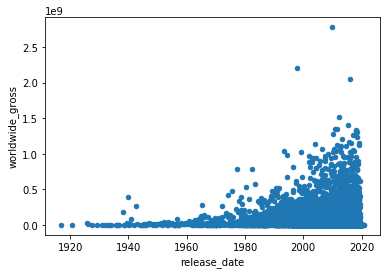

In [107]:
df.plot.scatter(x='release_date', y='worldwide_gross', rot=0)

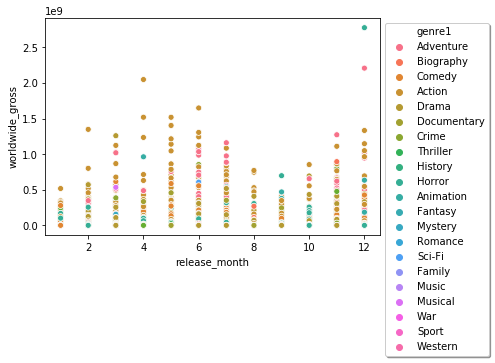

In [183]:
sns.scatterplot(x='release_month', y='worldwide_gross', data=df, hue='genre1')
plt.legend(fancybox=True, shadow=True, bbox_to_anchor=(1, 1))
plt.show()

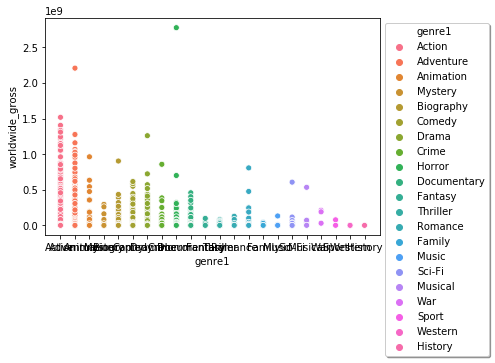

In [112]:
sns.scatterplot(x='genre1', y='worldwide_gross', data=df, hue='genre1')
plt.legend(fancybox=True, shadow=True, bbox_to_anchor=(1, 1))
plt.show()

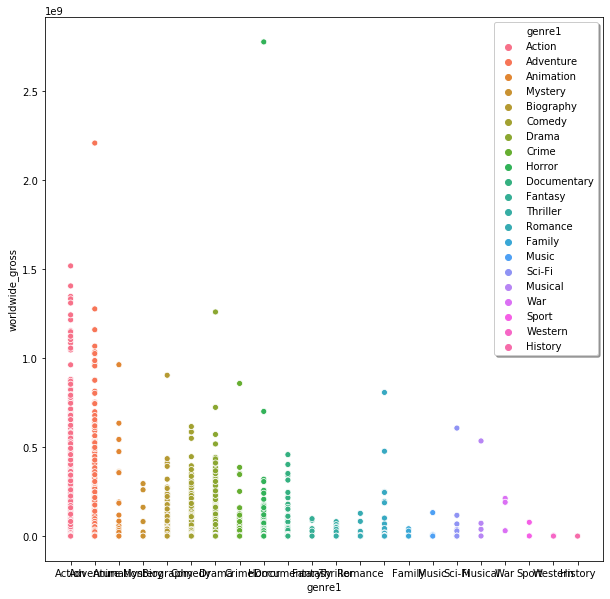

In [113]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='genre1', y='worldwide_gross', data=df, hue='genre1')
plt.legend(fancybox=True, shadow=True, bbox_to_anchor=(1, 1))
plt.show()

In [116]:
(df['worldwide_gross']/df['production_budget']).max()

1800.0

In [117]:
df['MoM'] = (df['worldwide_gross']/df['production_budget'])

In [118]:
df.head()

index                                              title  domestic_gross  \
0      0                           How to Train Your Dragon     217600000.0   
1      1                                         Iron Man 2     312400000.0   
2      2                                          Inception     292600000.0   
3      3  Percy Jackson & The Olympians: The Lightning T...      88800000.0   
4      4                                        Toy Story 3     415000000.0   

   foreign_gross release_date                      genres  vote_average  \
0    277300000.0   2010-03-26  Action,Adventure,Animation           7.7   
1    311500000.0   2010-05-07     Action,Adventure,Sci-Fi           6.8   
2    535700000.0   2010-07-16     Action,Adventure,Sci-Fi           8.3   
3    137700000.0   2010-02-11    Adventure,Family,Fantasy           6.1   
4    652000000.0   2010-06-17  Adventure,Animation,Comedy           7.7   

   popularity  worldwide_gross  production_budget     genre1     genre2  \
0      28.734     4.949000e+08                NaN     Action  Adventure   
1      28.515     6.239000e+08                NaN     Action  Adventure   
2      27.920     8.283000e+08                NaN     Action  Adventure   
3      26.691     2.265000e+08                NaN  Adventure     Family   
4      24.445     1.067000e+09                NaN  Adventure  Animation   

      genre3  MoM  
0  Animation  NaN  
1     Sci-Fi  NaN  
2     Sci-Fi  NaN  
3    Fantasy  NaN  
4     Comedy  NaN

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846 entries, 0 to 7845
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              7846 non-null   int64         
 1   title              7846 non-null   object        
 2   domestic_gross     7818 non-null   float64       
 3   foreign_gross      6497 non-null   float64       
 4   release_date       6842 non-null   datetime64[ns]
 5   genres             3908 non-null   object        
 6   vote_average       2382 non-null   float64       
 7   popularity         2382 non-null   float64       
 8   worldwide_gross    6469 non-null   float64       
 9   production_budget  4460 non-null   float64       
 10  genre1             3908 non-null   object        
 11  genre2             2975 non-null   object        
 12  genre3             1936 non-null   object        
 13  MoM                4460 non-null   float64       
dtypes: datet

In [181]:
df['release_year'] = df['release_date'].dt.year

df['release_month'] = df['release_date'].dt.month

df['release_day'] = df['release_date'].dt.day

In [182]:
df.head()

index                                              title  domestic_gross  \
0      3  Percy Jackson & The Olympians: The Lightning T...      88800000.0   
1     14                                  The King's Speech     135500000.0   
2     18                                   The Back-Up Plan      37500000.0   
3     27                        Scott Pilgrim vs. the World      31500000.0   
4     44                Prince of Persia: The Sands of Time      90800000.0   

   foreign_gross release_date                    genres  vote_average  \
0    137700000.0   2010-02-11  Adventure,Family,Fantasy           6.1   
1    275400000.0   2010-09-06   Biography,Drama,History           7.7   
2     40000000.0   2010-04-23            Comedy,Romance           6.0   
3     16100000.0   2010-08-13     Action,Comedy,Fantasy           7.3   
4    245600000.0   2010-05-27  Action,Adventure,Fantasy           6.2   

   popularity  worldwide_gross  production_budget     genre1     genre2  \
0      26.691      226500000.0                NaN  Adventure     Family   
1      16.798      410900000.0                NaN  Biography      Drama   
2      15.490       77500000.0                NaN     Comedy    Romance   
3      14.383       47600000.0                NaN     Action     Comedy   
4      13.440      336400000.0                NaN     Action  Adventure   

    genre3  release_year  release_month  release_day  
0  Fantasy        2010.0            2.0         11.0  
1  History        2010.0            9.0          6.0  
2     None        2010.0            4.0         23.0  
3  Fantasy        2010.0            8.0         13.0  
4  Fantasy        2010.0            5.0         27.0

In [191]:
df.describe()

index  domestic_gross  foreign_gross  vote_average   popularity  \
count  7846.000000    7.820000e+03   6.655000e+03   1198.000000  1198.000000   
mean   3460.775809    3.326429e+07   1.210039e+08      6.434391     7.083640   
std    1962.967165    6.428589e+07   2.286159e+08      0.900155     5.008573   
min       0.000000    0.000000e+00   0.000000e+00      1.000000     0.600000   
25%    1768.250000    2.030000e+05   4.400000e+06      5.900000     3.811000   
50%    3569.000000    6.858548e+06   3.608801e+07      6.500000     6.758000   
75%    4903.000000    3.915165e+07   1.328213e+08      7.100000     8.817250   
max    7250.000000    9.367000e+08   3.536853e+09     10.000000    60.534000   

       worldwide_gross  production_budget  release_year  release_month  \
count     6.629000e+03       5.698000e+03   6896.000000    6896.000000   
mean      8.850572e+07       3.181423e+07   2005.905887       6.996665   
std       1.736634e+08       4.197735e+07     11.827316       3.460141   
min       0.000000e+00       1.100000e+03   1916.000000       1.000000   
25%       3.660880e+06       5.000000e+06   2002.000000       4.000000   
50%       2.507894e+07       1.700000e+07   2009.000000       7.000000   
75%       9.254242e+07       4.000000e+07   2014.000000      10.000000   
max       2.776345e+09       4.250000e+08   2020.000000      12.000000   

       release_day  
count  6896.000000  
mean     16.260731  
std       8.795420  
min       1.000000  
25%       9.000000  
50%      17.000000  
75%      24.000000  
max      31.000000

In [198]:
df.groupby(['genre1']).mean().sort_values(by='domestic_gross',ascending=False)

index  domestic_gross  foreign_gross  vote_average  \
genre1                                                                  
Musical      3095.000000    7.426199e+07   2.355919e+08           NaN   
Adventure    2234.758123    7.121796e+07   2.940827e+08      6.633333   
War          1352.000000    6.191002e+07   2.058843e+08           NaN   
Action       2401.144458    5.726052e+07   2.499620e+08      6.242614   
Animation    2742.250000    3.944081e+07   1.967941e+08      6.972727   
             3805.375000    3.595774e+07   1.224702e+08      6.060000   
Sci-Fi       3870.545455    3.428727e+07   1.378052e+08      6.600000   
Mystery      3474.750000    3.364790e+07   1.242646e+08      5.966667   
Horror       4428.141176    2.747909e+07   9.517174e+07      5.432143   
Comedy       3408.962629    1.965503e+07   7.203240e+07      6.199219   
Sport        2163.000000    1.917145e+07   5.834289e+07           NaN   
Biography    3303.484536    1.844313e+07   7.444302e+07      6.780374   
Crime        3482.800000    1.614628e+07   6.495194e+07      6.484000   
Drama        3603.899894    1.468797e+07   6.275147e+07      6.475000   
Music        4207.333333    1.466582e+07   4.677994e+07           NaN   
Documentary  3461.527881    1.368477e+07   5.553392e+07      6.896296   
Fantasy      3429.571429    1.152078e+07   5.004272e+07      6.433333   
Thriller     4104.952381    1.109587e+07   3.900735e+07      5.744444   
Romance      4186.090909    8.039862e+06   4.842036e+07      6.600000   
History      3658.000000    5.600000e+06   1.175000e+07      7.100000   
Family       5674.375000    3.526189e+06   1.220840e+07           NaN   
Western      5615.333333    9.179700e+05   2.374849e+06           NaN   

             popularity  worldwide_gross  production_budget  release_year  \
genre1                                                                      
Musical             NaN     1.613299e+08       3.440000e+07   1998.750000   
Adventure      9.529397     2.263139e+08       7.051256e+07   2012.567669   
War                 NaN     1.439742e+08       5.200000e+07   1998.000000   
Action         9.134307     1.942443e+08       7.050101e+07   2012.696552   
Animation      8.170000     1.445136e+08       4.902324e+07   2010.581395   
               5.038800     8.498711e+07       2.423996e+07   2004.741935   
Sci-Fi         9.870000     9.616273e+07       2.983556e+07   2005.100000   
Mystery       10.988667     8.546246e+07       2.862143e+07   2007.200000   
Horror         7.624857     6.931085e+07       1.534134e+07   2010.469880   
Comedy         6.886504     5.076849e+07       2.050837e+07   2012.034934   
Sport               NaN     3.917145e+07       3.650000e+07   1998.000000   
Biography      6.234850     5.244537e+07       2.146822e+07   2012.950192   
Crime          7.637460     4.527175e+07       2.242441e+07   2011.188235   
Drama          6.642000     4.447672e+07       1.932375e+07   2010.964286   
Music               NaN     2.923535e+07       1.520000e+07   2007.400000   
Documentary    4.700241     3.800423e+07       1.863002e+07   2009.004115   
Fantasy        8.119333     3.650367e+07       2.311429e+07   2013.400000   
Thriller       7.970111     2.454728e+07       1.562177e+07   2006.225000   
Romance        7.190000     3.630158e+07       2.692500e+07   2009.857143   
History       12.329000     1.735000e+07       5.000000e+05   2012.500000   
Family              NaN     8.846710e+06       4.014286e+06   2007.571429   
Western             NaN     1.456879e+06       6.000000e+06   2004.000000   

             release_month  release_day  
genre1                                   
Musical           7.250000    14.750000  
Adventure         7.063910    16.582707  
War               5.000000    21.666667  
Action            6.664828    16.651034  
Animation         7.674419    17.581395  
                  6.709677    16.935484  
Sci-Fi            6.000000    21.100000  
Mystery           5.300000    16.900000

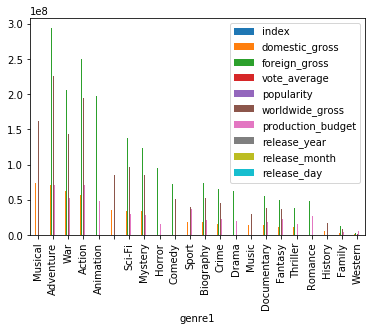

In [199]:
(df.groupby(['genre1']).mean().sort_values(by='domestic_gross',ascending=False)).plot.bar()